# Ames, Iowa Housing Project
## Notebook 00 - EDA

In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8
rcParams.update({'font.size': 12})

## Load Data

In [2]:
url = 'http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls'
housing_df = pd.read_excel(url)
# Save original dataset
housing_df.to_csv('../data/housing.csv')

In [3]:
# Make column labels lowercase
housing_df.columns = map(str.lower, housing_df.columns)
# Replace spaces in columns with underscore
housing_df.columns = housing_df.columns.str.replace('\s+', '_')

In [4]:
housing_df.head()

,order,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
housing_df.shape

(2930, 82)

In [6]:
# Set 'Id' column as index
housing_df.set_index('order', inplace=True)
# Drop 'pid' column if not needed
# housing_df.drop('pid',axis=1, inplace=True)
housing_df.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 00 - Exploratory Data Analysis (EDA)

### A. Data Types

In [7]:
housing_df.columns

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

In [8]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 1 to 2930
Data columns (total 81 columns):
pid                2930 non-null int64
ms_subclass        2930 non-null int64
ms_zoning          2930 non-null object
lot_frontage       2440 non-null float64
lot_area           2930 non-null int64
street             2930 non-null object
alley              198 non-null object
lot_shape          2930 non-null object
land_contour       2930 non-null object
utilities          2930 non-null object
lot_config         2930 non-null object
land_slope         2930 non-null object
neighborhood       2930 non-null object
condition_1        2930 non-null object
condition_2        2930 non-null object
bldg_type          2930 non-null object
house_style        2930 non-null object
overall_qual       2930 non-null int64
overall_cond       2930 non-null int64
year_built         2930 non-null int64
year_remod/add     2930 non-null int64
roof_style         2930 non-null object
roof_matl          2

**MSSubClass: Identifies the type of dwelling involved in the sale.**	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
The MSSubClass was converted to int64 by Pandas because the column is all integers. However, these are categories that have been assigned arbitrary numbers for classification purposes.

In [9]:
# Convert 'MSSubClass' column to type(str)
housing_df['ms_subclass'] = housing_df['ms_subclass'].astype(str)

In [10]:
housing_df['ms_subclass'].dtype

dtype('O')

### B. Plot Histograms of the Numeric Columns

In [11]:
# Create list of numeric columns
numeric_columns = housing_df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)

['pid', 'lot_frontage', 'lot_area', 'overall_qual', 'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice']


In [12]:
# Print how many numeric columns so figure out plot grid
print('\n', len(numeric_columns), 'numerical columns')


 37 numerical columns


In [1]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,100))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax, alpha=0.8)
        plt.axvline(df[var_name].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
        plt.axvline(df[var_name].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')
        ax.set_title(var_name+" Distribution")
        plt.legend()
    fig.tight_layout()
    plt.save('../assets/png/histograms.png')
    plt.show()

In [2]:
draw_histograms(housing_df, numeric_columns, int(len(numeric_columns)/2)+1, 2)

NameError: name 'housing_df' is not defined

### C. Plot the Numeric Columns Against ```saleprice``` Using Scatterplots

In [15]:
# Draw scatter plots of numerical columns
def draw_scatters(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15,60))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.regplot(x=var_name,y='saleprice',data=df,fit_reg=False, scatter_kws={'alpha':0.2})
        ax.set_title(var_name +" vs. Sale Price")
    fig.tight_layout()
    plt.savefig('../assets/png/scatters.png')
    plt.show()

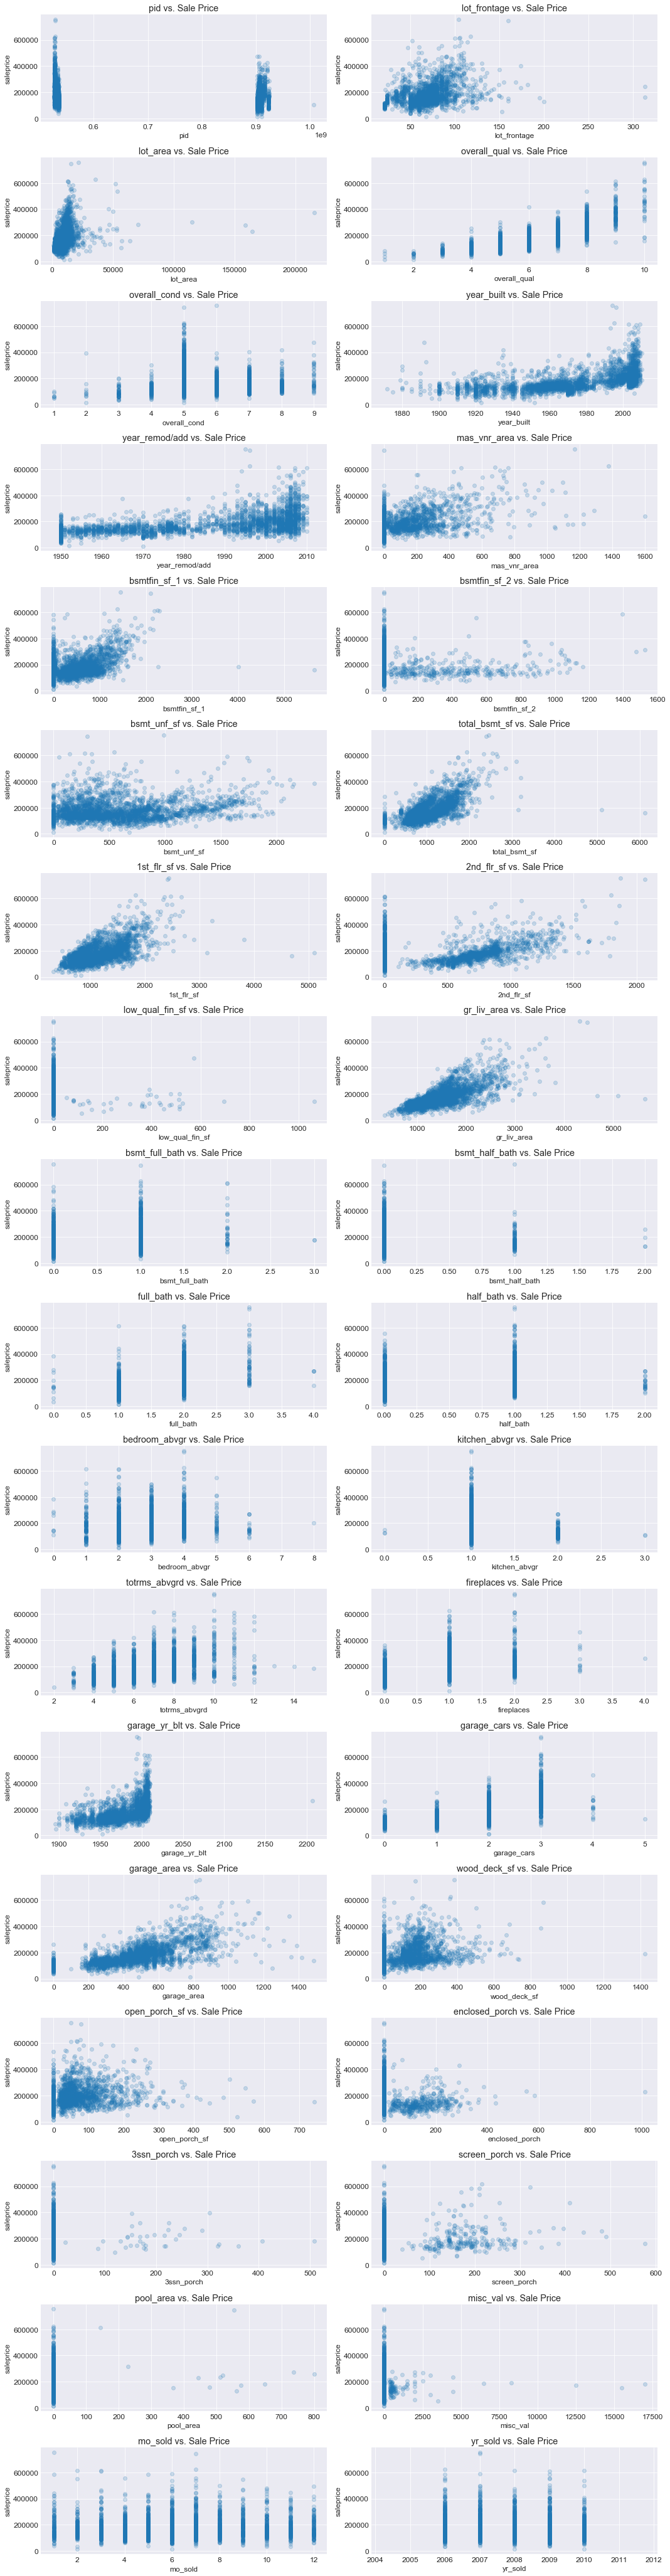

In [16]:
draw_scatters(housing_df, numeric_columns[:-1], int(len(numeric_columns[:-1])/2)+1, 2)

### D. Use Bar Plots to Plot Categorical Features against ```saleprice```

In [17]:
# Create list of categorical columns
cat_columns = housing_df.select_dtypes(include=[object]).columns.tolist()
print(cat_columns)

['ms_subclass', 'ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc', 'central_air', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature', 'sale_type', 'sale_condition']


In [18]:
# Print how many categorical columns so figure out plot grid
print(len(cat_columns), 'categorical columns')

44 categorical columns


In [19]:
# Draw bar plots of categorical data
def draw_bars(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,160))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.barplot(x=var_name,y='saleprice',data=df,ci='sd')
        if var_name in ['neighborhood','exterior_1st','exterior_2nd']:
            plt.sca(ax)
            plt.xticks(rotation=70)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.savefig('../assets/png/bars.png')
    plt.show()

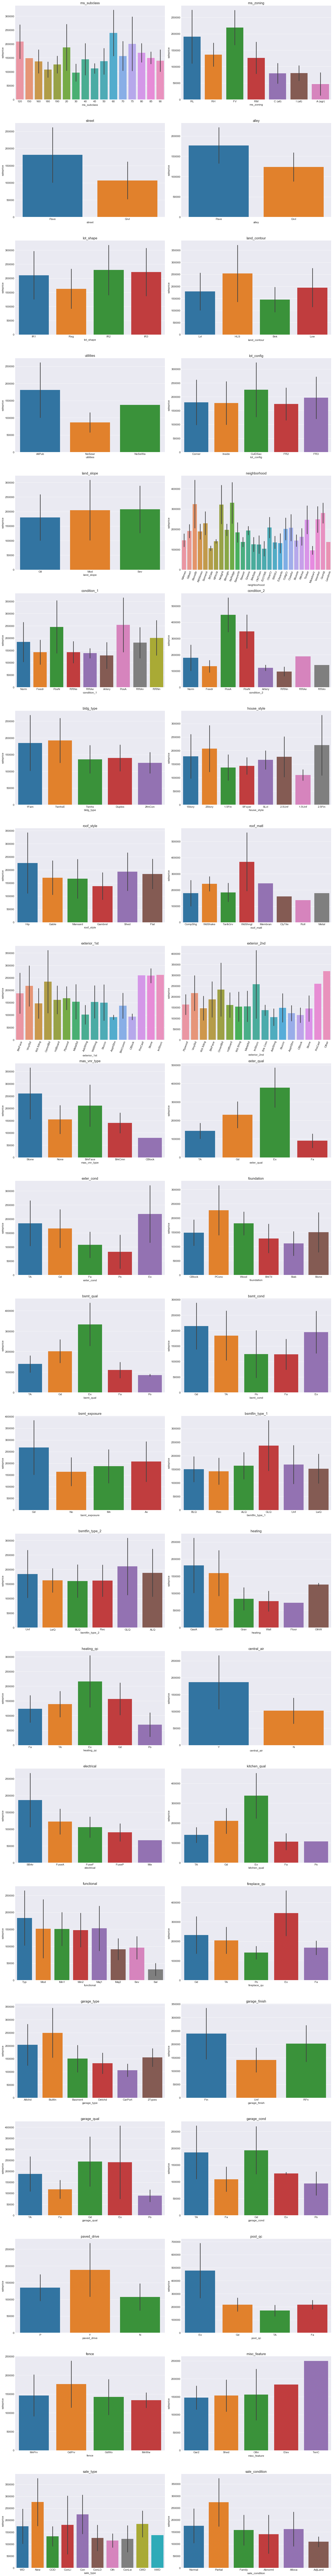

In [20]:
draw_bars(housing_df, cat_columns, int(len(cat_columns)/2)+1, 2)

### D. Plot Correlations

In [21]:
corr = housing_df.corr()
corr['saleprice'].sort_values(ascending=False)

saleprice          1.000000
overall_qual       0.799262
gr_liv_area        0.706780
garage_cars        0.647877
garage_area        0.640401
total_bsmt_sf      0.632280
1st_flr_sf         0.621676
year_built         0.558426
full_bath          0.545604
year_remod/add     0.532974
garage_yr_blt      0.526965
mas_vnr_area       0.508285
totrms_abvgrd      0.495474
fireplaces         0.474558
bsmtfin_sf_1       0.432914
lot_frontage       0.357318
wood_deck_sf       0.327143
open_porch_sf      0.312951
half_bath          0.285056
bsmt_full_bath     0.276050
2nd_flr_sf         0.269373
lot_area           0.266549
bsmt_unf_sf        0.182855
bedroom_abvgr      0.143913
screen_porch       0.112151
pool_area          0.068403
mo_sold            0.035259
3ssn_porch         0.032225
bsmtfin_sf_2       0.005891
misc_val          -0.015691
yr_sold           -0.030569
bsmt_half_bath    -0.035835
low_qual_fin_sf   -0.037660
overall_cond      -0.101697
kitchen_abvgr     -0.119814
enclosed_porch    -0

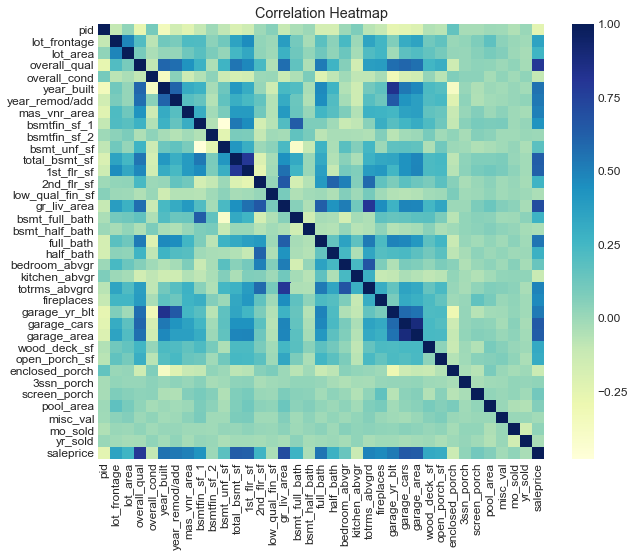

In [22]:
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.savefig('../assets/png/heatmap.png')
plt.show()

### E. Save Current Data

In [23]:
housing_df.to_pickle('../data/housing_df.pkl')

In [24]:
with open('../data/cat_columns.pkl', 'wb') as f:
    pickle.dump(cat_columns, f)